# Exam

1. Basic Vector and Matrix Operations
    * 8 questions * 2 points

2. Similarity
    * 2 questions * 3 points
    * 1 question * 2 points

3. Determinant
    * 1 question * 4 points

4. Inverse of Matrix
    * 2 questions * 3 points

5. Transformation
    * 1 questions * 5 points
    
6. Derivatives
    * 1 question * 5 points
    
7. Partial Derivatives
    * 1 question * 5 points

In [13]:
# 시험에 사용할 데이터
# 300개의 instance. 각 instance는 5개의 feature로 구성.
import numpy as np
import math

np.random.seed(1000)

generate_data = False
data_file_name = 'data.npy'

if generate_data:
    d = np.random.rand(300, 5)
    np.save(data_file_name, d)
    print(f'generate data {d.shape}')
    
d = np.load(data_file_name)
print(f'read data {d.shape}')

def check(msg, y, y_h, eps = 0.0000001):
    # eps = 0.0000001
    if isinstance(y, np.ndarray):
        # np.array_equal(y, y_h)}
        mse = ((y - y_h) ** 2).mean()
        print(f'[{msg}] Your answer is [{mse < eps}]')
    elif isinstance(y, float):
        mse = math.sqrt((y - y_h) ** 2)
        print(f'[{msg}] Your answer is [{mse < eps}]')
    else:
        print(f'[{msg}] Your answer is [{y == y_h}]')
    try:
        print(f'y   = {y[:5]}\ny_h = {y_h[:5]}\n')
    except:
        print(f'y   = {y}\ny_h = {y_h}\n')

ModuleNotFoundError: No module named 'numpy'

## 1. Basic Vector and Matrix Operations 

* numpy에서 제공하는 함수를 사용하지 말고 직접 구현

In [97]:
a = d[0]
b = d[1]

dot_y = np.dot(a,b)

norm_y = np.linalg.norm(a)

dist_y = np.linalg.norm(a-b)

unit_y= a / np.linalg.norm(a)

cosine_y = a.dot(b) / (np.linalg.norm(a) * np.linalg.norm(b))

vec_proj_y = np.dot(a, b / np.linalg.norm(b)) * b / np.linalg.norm(b)

In [96]:
# 2 points
def dot_product(a, b):
    r = 0.0
#### YOUR CODE - START ####
    for i in range(len(a)):
        r += a[i] * b[i]
#### YOUR CODE - END   ####
    return r

# 2 points
def l2norm(a): 
    r = 0.0
#### YOUR CODE - START ####
    for i in range(len(a)):
        r += a[i] ** 2
    
    r = math.sqrt(r)
#### YOUR CODE - END   ####
    return r

# 2 points
def distance(a, b):
    r = 0.0
#### YOUR CODE - START ####
    for i in range(len(a)):
        r += (a[i] - b[i]) ** 2 
    r = math.sqrt(r)
#### YOUR CODE - END   ####
    return r

# 2 points
def unit_vector(a):
    r = a[:]
#### YOUR CODE - START ####
    for i in range(len(a)):
        r[i] = a[i] / l2norm(a)
#### YOUR CODE - END   ####
    return r

# 2 points
def cosine(a, b):
    r = 0.0
#### YOUR CODE - START ####
    # print(dot_product(a,b))
    r = dot_product(a, b) / l2norm(a) / l2norm(b)
#### YOUR CODE - END   ####
    return r

# 2 points
# project a on b. 
def vec_proj_a_on_b(a, b):
    r = np.zeros(b.shape)
#### YOUR CODE - START ####
    a_unit = unit_vector(a)
    b_unit = unit_vector(b)
    pro_size = l2norm(a) * cosine(a, b)
    for i in range(len(a)):
        r[i] = b_unit[i] * pro_size
#### YOUR CODE - END   ####
    return r

check('Dot Product', dot_y, dot_product(a,b))

check('L2 Norm', norm_y, l2norm(a))

check('Distance', dist_y, distance(a,b))

check('Unit Vector', unit_y, unit_vector(a))

check('Cosine', cosine_y, cosine(a, b))

check('Vector Projection', vec_proj_y, vec_proj_a_on_b(a, b))

[Dot Product] Your answer is [True]
y   = 0.9484025521830949
y_h = 0.9484025521830949

[L2 Norm] Your answer is [True]
y   = 1.0000000167596343
y_h = 1.0000000167596343

[Distance] Your answer is [True]
y   = 0.32123896369842464
y_h = 0.32123896369842464

[Unit Vector] Your answer is [True]
y   = [0.3621195  0.0688169  0.56994781 0.34450961 0.64854169]
y_h = [0.3621195  0.0688169  0.56994781 0.34450961 0.6485417 ]

0.9484025418985969
[Cosine] Your answer is [True]
y   = 0.9484027531666301
y_h = 0.9484027540382975

0.9484027176564644
[Vector Projection] Your answer is [True]
y   = [0.20560983 0.03938192 0.38422715 0.22478682 0.81085255]
y_h = [0.20560983 0.03938192 0.38422714 0.2247868  0.8108525 ]



In [68]:
a = np.array([[1,4],[2,5],[3,6]])
b = np.array([[1,0], [0,1]])

mat_tr_y = np.array([[1,2,3], [4,5,6]])
mat_mul_y = np.array([[1,4],[2,5],[3,6]])

In [69]:
# 2 points
def transpose(a):
    r = np.zeros((a.shape[1], a.shape[0]))
#### YOUR CODE - START ####
    for i in range(len(a)):
        for j in range(len(a[0])):
            r[j][i] = a[i][j]
#### YOUR CODE - END   ####         
    return r

# 2 points
def mat_mul(a, b):
    r = np.zeros((a.shape[0], b.shape[1]))
    # print(f'a = {a.shape}, b = {b.shape}, r = {r.shape}')
#### YOUR CODE - START ####
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(a[0])):
                r[i][j] += a[i][k] * b[k][j]
#### YOUR CODE - END   ####
    return r

check('Matrix Traspose', mat_tr_y, transpose(a))

check('Matrix Multiplication', mat_mul_y, mat_mul(a, b))

[Matrix Traspose] Your answer is [True]
y   = [[1 2 3]
 [4 5 6]]
y_h = [[1. 2. 3.]
 [4. 5. 6.]]

[Matrix Multiplication] Your answer is [True]
y   = [[1 4]
 [2 5]
 [3 6]]
y_h = [[1. 4.]
 [2. 5.]
 [3. 6.]]



## 2. Similarity

* d = 300 x 5
* 300개의 instance. 각 instance는 5개의 feature로 구성.

In [ ]:
# 3 points
def get_dot_product_matrix(a):
    r = np.zeros((a.shape[0], a.shape[0]))
#### YOUR CODE - START ####

#### YOUR CODE - END   ####
    np.fill_diagonal(r, -10000000000)
    return r

# 3 points
def get_cosine_matrix(a):
    r = np.zeros((a.shape[0], a.shape[0]))
#### YOUR CODE - START ####

#### YOUR CODE - END   ####
    np.fill_diagonal(r, -10000000000)
    return r

# 2 points
def get_index_pair_with_max_score(a):
    i, j = -1, -1
#### YOUR CODE - START ####

#### YOUR CODE - END   ####         
    return (i, j)

In [ ]:
max_idx_pair_y = (42, 268)
print(f'max_index_pair={max_idx_pair_y}')
check('Dot Product Similarties', 
      max_idx_pair_y, 
      get_index_pair_with_max_score(get_dot_product_matrix(d))
      )


max_idx_pair_y = (78, 186)
print(f'max_index_pair={max_idx_pair_y}')
check('Cosine Similarties', 
      max_idx_pair_y, 
      get_index_pair_with_max_score(get_cosine_matrix(d))
      )


## 3. Determinant

In [138]:
# m = np.array([[8, 1, 6],
#               [3, 5, 7],
#               [4, 9, 2]]
#              )

m = np.array([[8, 1, 6, 2],
              [3, 5, 7, 1],
              [4, 9, 2, 4],
              [1, 1, 1, 1]]
             )

det_y = np.linalg.det(m)

In [101]:
k = np.array([[8, 1, 6, 2],
              [3, 5, 7, 1],
              [4, 9, 2, 4],
              [1, 1, 1, 1]]
             )
print(len(k))
d = np.delete(k, 0, axis=0)
print(d)

4
[[3 5 7 1]
 [4 9 2 4]
 [1 1 1 1]]


In [139]:
# 4 points
def get_determinant(m):
    det = 0
    
    if len(m) < 3:
        return m[0][0] * m[1][1] - m[0][1] * m[1][0]
    else:
        mat = np.delete(m,0,axis = 1)
        for i in range(0, len(m)):
            mat_ = np.delete(mat, i, axis = 0)
            det += m[i][0] * get_determinant(mat_) * ((-1) ** i)
            
    
    
    return det

print(m)
check('Determinant', det_y, get_determinant(m))

[[8 1 6 2]
 [3 5 7 1]
 [4 9 2 4]
 [1 1 1 1]]
[Determinant] Your answer is [True]
y   = -191.99999999999983
y_h = -192



## 4. Inverse of Matrix

In [ ]:
m = np.array([[8, 1, 6, 2],
              [3, 5, 7, 1],
              [4, 9, 2, 4],
              [1, 1, 1, 1]]
             )

inv_y = np.linalg.inv(m)

# 3 points 
def get_cofactor_matrix(m):
    r = np.zeros(m.shape)
#### YOUR CODE - START ####



#### YOUR CODE - END   #### 
    return r

# 3 points
def get_inverse(m):
    r = np.zeros(m.shape)
#### YOUR CODE - START ####



#### YOUR CODE - END   #### 
    return r

check('Inverse', inv_y, get_inverse(m), eps=0.1)

## 5. Transformation

In [141]:
# If you use homogeneous coordinates, 5 points; otherwise, 3 points.

def composite_transformation_1(x, theta, trans, scale) :
    r = np.zeros_like(x, dtype=float)
    #### YOUR CODE - START ####

    
        
    #### YOUR CODE - END   ####
    return r


_d = d[:, 0:2]

angle = 45
scale = 2
tr = (1, -1)

trans_y_h = composite_transformation_1(_d, np.radians(angle), tr, scale)
trans_y = np.load('transform.npy')

check('Transformation', trans_y, trans_y_h)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


ValueError: operands could not be broadcast together with shapes (300,2) (3,2) 

## 6. Derivatives - Optimization

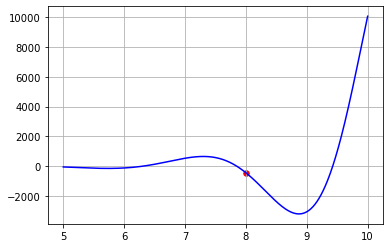

current Y = -429.11384565426516


In [196]:
import matplotlib.pyplot as plt
import numpy as np

def plot_single_variable_function(f,interval, point=None):
    x_space= np.linspace(*interval,100000)
    y_space=f(x_space)
    plt.plot(x_space,y_space,color='blue')
    if point != None:
        plt.scatter(point,f(point),color='red', s=30)
    plt.grid()
    plt.show()
    
def func1(x):
    return np.exp(x)*np.sin(x)*np.cos(x)

start_point = 8
plot_single_variable_function(func1, (5,10), start_point)
print('current Y =', func1(start_point))

-3283.8786328625242


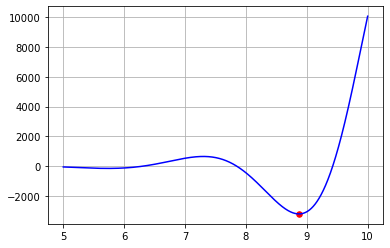

[Derivatives] Your answer is [True]
y   = -3185.882614380583
y_h = -3185.882614383753



In [210]:
# If you use analytic derivative, 5 points; neumric derivative, 3 points.

DELTA_X = 1e-5
EPSILON=1e-7

minimum = -3185.882614380583

#### YOUR CODE - START ####
def derivative(f, point, h=DELTA_X):
    # gradient = 0
    # return gradient * 0.0001
    return (f(point+h) - f(point))/h

    
def gradient_descent(start_point):
    la = 0.0001
    x = start_point
    dy_dx = derivative(func1, x)
    print(derivative(func1, x))
    while np.abs(dy_dx) > EPSILON:
        # print(1)
        x = x - dy_dx * 0.0001
        dy_dx = derivative(func1, x)
        

        
    return x
#### YOUR CODE - END ####

best_x = gradient_descent(start_point)
plot_single_variable_function(func1, (5,10), best_x)
check('Derivatives', minimum, func1(best_x))

## 7. Partial Derivatives - Optimization

In [3]:
def plot_multi_variable_function(f,interval, point=None):
    x_space = np.linspace(*interval, 100)
    y_space = np.linspace(*interval, 100)
    X, Y = np.meshgrid(x_space, y_space)
    Z = f(X, Y)
    
    fig = plt.figure(figsize=(12, 6))   
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    if point != None:
        ax1.scatter(point[0], point[1], f(point[0], point[1]), marker='s', color='black', s=10)
    plt.grid()
    plt.show()
    
def func2(x,y):
    return -x**4-y**4+x**3+3*x**2+y**2+(x*y)**2

start_point = (1.0,1.0)
plot_multi_variable_function(func2, (-3,3), start_point)
print('current Z =', func2(start_point[0], start_point[1]))

NameError: name 'np' is not defined

In [1]:
DELTA_X = 1e-5
EPSILON=1e-7

minimum = 10.36046074289994

#### YOUR CODE - START ####
def partial_derivative(f, point, h=DELTA_X):
    df_dx = 0.0
    df_dy = 0.0
    df_dx = (func2(point[0] + h, point[1]) - func2(point[0], point[1])) / h
    df_dx = (func2(point[0], point[1] + h)-func2(point[0], point[1])) / h
    # print(f(point[0],point[1]))
    # print(df_dx)
    return df_dx*1.0, df_dy* 1.0
    
def gradient_ascent(start_point):
    xy = start_point
    # x = float(start_point[0])
    # y = float(start_point[1])
    # print(start_point)
    # df_dx, df_dy = partial_derivative(func2, start_point, h=DELTA_X)
    # print(partial_derivative(func2, xy, h=DELTA_X))
    x = 1.0
    y = 1.0
    df_dx, df_dy = partial_derivative(func2, (1.0,1.0), h=DELTA_X)
    while np.abs(df_dx) > EPSILON or np.abs(df_dy) > EPSILON:
        x += df_dx * 0.001
        y += df_dy * 0.001
        # print(df_dx, df_dy)
        df_dx, df_dy = partial_derivative(func2, xy, h=DELTA_X)
        
        xy = (x,y)
    return xy
#### YOUR CODE - END ####

best_xy = gradient_ascent(start_point)
plot_multi_variable_function(func2, (-3,3), best_xy)
check('Derivatives', minimum, func2(best_xy[0], best_xy[1]))

NameError: name 'start_point' is not defined